<a href="https://colab.research.google.com/github/bthosar/datasharing/blob/master/Statistical_Bharat_Thosar_NLP_R8_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import warnings
#warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
from google.colab import files
uploaded = files.upload()

In [8]:
#select 5000 rows
df = pd.read_csv('blogtext.csv', nrows= 5000)
df.sample(5)

,id,gender,age,topic,sign,date,text
2752,589736,male,35,Technology,Aries,"05,August,2004","urlLink children's chorus, singing..."
2041,589736,male,35,Technology,Aries,"05,August,2004","Thanks Mir, it worked! Julie came ..."
14,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004","urlLink Here it is, the super..."
4813,1077954,male,26,indUnk,Gemini,"31,August,2003","Thursday Augest 28, 2003 was OZZFest, a..."
313,649790,female,24,indUnk,Scorpio,"03,July,2002",Drew drew a picture of drool......


2. Preprocess rows of the “text” column (7.5 points)

In [9]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
def normalizer(blogs):
    blogs = " ".join(filter(lambda x: x[0]!= '@' , blogs.split()))
    blogs = re.sub('[^a-zA-Z]', ' ', blogs)
    blogs = blogs.lower()
    blogs = re.sub(' +', ' ', blogs).strip()
    blogs = blogs.split()
    blogs = [word for word in blogs if not word in set(stopwords.words('english'))]
    blogs = [lemma.lemmatize(word) for word in blogs]
    
    blogs = " ".join(blogs)
    return blogs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


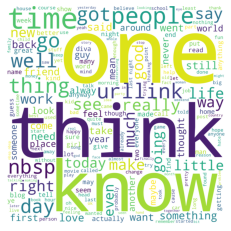

In [11]:

df['normalized_text'] = df.text.apply(normalizer)
df.head()
# all tweets 
all_words = " ".join(df.normalized_text)
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points)

In [13]:
##  create another dataframe dfBT having only the columns needed for creating label
dfBT=df[['gender', 'age', 'topic', 'sign']]
## Convert age from int type into String
dfT['age']=dfT['age'].astype('str')
## Create a 2D Matrix 'm' which is list of list contaning 'gender', 'age', 'topic', 'sign' for each row
m=[]                              # 2D Matrix having list of list
for i in range(dfT.shape[0]):
    g=[]                          # 1D list of 'gender', 'age', 'topic', 'sign'
    for j in range(dfT.shape[1]):
        g.append(dfT.iloc[i][j])
    m.append(g)

#Add a column called labels
df['labels']=m
df.head()
final_df = df[['normalized_text', 'labels']]
final_df.head()
# Lets Check Distribution of Labels
final_df['labels'].astype('str').value_counts()
## Check for Null Values
final_df.isna().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


normalized_text    0
labels             0
dtype: int64

# 4. Separate features and labels, and split the data into training and testing

In [21]:
X = final_df['normalized_text']
y = final_df['labels']

In [22]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

# 5. Vectorize the features

In [23]:
vectorizer = CountVectorizer(ngram_range = (1,2), stop_words=stopwords.words('english'), 
                             min_df = 0.15, max_df = 0.8, max_features = 100)

In [24]:
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
X_train_dtm

<3750x24 sparse matrix of type '<class 'numpy.int64'>'
	with 18200 stored elements in Compressed Sparse Row format>

In [25]:
# check the vocabulary( First 15 features)
vectorizer.get_feature_names()[:10]

['back', 'day', 'even', 'get', 'go', 'going', 'good', 'got', 'know', 'like']

In [26]:
print(X_train_dtm )

  (0, 5)	1
  (0, 6)	3
  (0, 17)	1
  (0, 12)	1
  (0, 4)	2
  (1, 4)	1
  (1, 7)	1
  (1, 20)	2
  (1, 9)	2
  (1, 16)	1
  (1, 10)	1
  (1, 18)	1
  (2, 20)	2
  (3, 12)	1
  (3, 19)	1
  (3, 3)	2
  (3, 0)	2
  (3, 23)	1
  (3, 8)	1
  (4, 2)	1
  (5, 4)	1
  (5, 9)	1
  (5, 10)	2
  (5, 8)	2
  (7, 6)	1
  :	:
  (3743, 18)	5
  (3743, 19)	1
  (3743, 23)	1
  (3743, 8)	8
  (3743, 2)	1
  (3743, 1)	1
  (3743, 11)	1
  (3743, 13)	2
  (3746, 3)	1
  (3748, 5)	4
  (3748, 17)	1
  (3748, 7)	1
  (3748, 18)	3
  (3748, 19)	1
  (3748, 3)	2
  (3748, 23)	2
  (3748, 8)	3
  (3748, 2)	2
  (3748, 14)	1
  (3748, 11)	1
  (3748, 21)	1
  (3748, 22)	1
  (3748, 13)	1
  (3749, 9)	1
  (3749, 16)	1


In [27]:
# examine vocabulary and document term matrix together
pd.DataFrame(X_train_dtm.toarray(), columns = vectorizer.get_feature_names())

,back,day,even,get,go,going,good,got,know,like,make,much,one,people,really,say,see,thing,think,time,urllink,way,well,would
0,0,0,0,0,2,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,2,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
3,2,0,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3746,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3748,0,0,2,2,0,4,0,1,3,0,0,1,0,1,1,0,0,1,3,1,0,1,1,2


In [28]:
print(X_train_dtm )

  (0, 5)	1
  (0, 6)	3
  (0, 17)	1
  (0, 12)	1
  (0, 4)	2
  (1, 4)	1
  (1, 7)	1
  (1, 20)	2
  (1, 9)	2
  (1, 16)	1
  (1, 10)	1
  (1, 18)	1
  (2, 20)	2
  (3, 12)	1
  (3, 19)	1
  (3, 3)	2
  (3, 0)	2
  (3, 23)	1
  (3, 8)	1
  (4, 2)	1
  (5, 4)	1
  (5, 9)	1
  (5, 10)	2
  (5, 8)	2
  (7, 6)	1
  :	:
  (3743, 18)	5
  (3743, 19)	1
  (3743, 23)	1
  (3743, 8)	8
  (3743, 2)	1
  (3743, 1)	1
  (3743, 11)	1
  (3743, 13)	2
  (3746, 3)	1
  (3748, 5)	4
  (3748, 17)	1
  (3748, 7)	1
  (3748, 18)	3
  (3748, 19)	1
  (3748, 3)	2
  (3748, 23)	2
  (3748, 8)	3
  (3748, 2)	2
  (3748, 14)	1
  (3748, 11)	1
  (3748, 21)	1
  (3748, 22)	1
  (3748, 13)	1
  (3749, 9)	1
  (3749, 16)	1


In [29]:
# examine vocabulary and document term matrix together
pd.DataFrame(X_test_dtm.toarray(), columns = vectorizer.get_feature_names())

,back,day,even,get,go,going,good,got,know,like,make,much,one,people,really,say,see,thing,think,time,urllink,way,well,would
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0,0,0,0
1247,1,2,2,5,2,2,1,2,2,0,0,0,3,0,3,0,1,0,0,1,0,1,2,6
1248,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


# Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference 

In [30]:
dfT = df[['gender', 'age', 'topic', 'sign']]

In [31]:
dfT['age'] = dfT['age'].astype('str')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
keys=[] 
values=[] 

for i in range(dfT.shape[1]): # iterate through all the colummns        
    for j in range(dfT.iloc[:,i].value_counts().shape[0]): # iterate through all the rows of value_counts of that column
        keys.append(dfT.iloc[:,i].value_counts().index[j])         
        values.append(dfT.iloc[:,i].value_counts().iloc[j])

In [33]:
dictionary = dict(zip(keys,values))

In [34]:
print(dictionary)

{'male': 3294, 'female': 1706, '35': 2307, '34': 540, '24': 353, '15': 339, '17': 331, '25': 268, '14': 170, '23': 137, '33': 101, '26': 96, '27': 86, '39': 79, '16': 67, '36': 60, '37': 19, '41': 14, '45': 14, '42': 9, '46': 7, '44': 3, 'Technology': 2332, 'indUnk': 1381, 'Student': 569, 'Engineering': 119, 'Education': 118, 'BusinessServices': 87, 'Sports-Recreation': 75, 'InvestmentBanking': 70, 'Communications-Media': 61, 'Non-Profit': 47, 'Science': 33, 'Arts': 31, 'Internet': 20, 'Banking': 16, 'Consulting': 16, 'Automotive': 14, 'Religion': 4, 'Law': 3, 'Accounting': 2, 'Museums-Libraries': 2, 'Aries': 2483, 'Sagittarius': 704, 'Libra': 414, 'Scorpio': 408, 'Aquarius': 329, 'Leo': 190, 'Taurus': 100, 'Cancer': 94, 'Gemini': 86, 'Capricorn': 84, 'Pisces': 67, 'Virgo': 41}


# 7. Transform the labels

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer(classes=sorted(dictionary.keys()))
y_train_mlb = mlb.fit_transform(y_train)
y_test_mlb = mlb.transform(y_test)

In [36]:
y_train_mlb[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [37]:
y_test_mlb[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [38]:
y_train.iloc[1]

['male', '39', 'Education', 'Virgo']

In [39]:
mlb.inverse_transform(y_train_mlb)[1]

('39', 'Education', 'Virgo', 'male')

# 8. Choose a classifier

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
ovr = OneVsRestClassifier(lr)

ovr.fit(X_train_dtm, y_train_mlb)
y_pred_ovr_test = ovr.predict(X_test_dtm)
#y_proba_ovr = ovr.predict_proba(X_test_dtm)
y_pred_ovr_test

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:75: UserWarning: Label not 20 is present in all training examples.
  str(classes[c]))


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [41]:
y_pred_ovr_train = ovr.predict(X_train_dtm)
y_pred_ovr_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

# 9. Fit the classifier, make predictions and get the accuracy

In [42]:
def print_scores(actual, predicted, averaging_type):
    print('\nAVERAGING TYPE==> ',averaging_type)
    print('F1 score: ',f1_score(actual,predicted, average=averaging_type))
    print('Average Precision Score: ',average_precision_score(actual,predicted, average=averaging_type))
    print('Average Recall Score: ',recall_score(actual,predicted, average=averaging_type))

In [43]:
print('--------------------------TRAIN SCORES--------------------------------')
print('Accuracy score: ',accuracy_score(y_train_mlb, y_pred_ovr_train))
print_scores(y_train_mlb, y_pred_ovr_train, 'micro')
print_scores(y_train_mlb, y_pred_ovr_train, 'macro')
print_scores(y_train_mlb, y_pred_ovr_train, 'weighted')

--------------------------TRAIN SCORES--------------------------------
Accuracy score:  0.3792

AVERAGING TYPE==>  micro
F1 score:  0.5674053736026672
Average Precision Score:  0.37068071991953844
Average Recall Score:  0.4822

AVERAGING TYPE==>  macro
F1 score:  0.11813605100170366


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behav

Average Precision Score:  nan
Average Recall Score:  0.09994636798882939

AVERAGING TYPE==>  weighted
F1 score:  0.4560601481067299
Average Precision Score:  0.43236015674888184
Average Recall Score:  0.4822


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print('--------------------------TEST SCORES--------------------------------')
print('Accuracy score: ',accuracy_score(y_test_mlb, y_pred_ovr_test))
print_scores(y_test_mlb, y_pred_ovr_test, 'micro')
print_scores(y_test_mlb, y_pred_ovr_test, 'macro')
print_scores(y_test_mlb, y_pred_ovr_test, 'weighted')

--------------------------TEST SCORES--------------------------------
Accuracy score:  0.3984

AVERAGING TYPE==>  micro
F1 score:  0.5827598273649831
Average Precision Score:  0.38635320458998035
Average Recall Score:  0.4996

AVERAGING TYPE==>  macro
F1 score:  0.10054771379652098
Average Precision Score:  nan
Average Recall Score:  0.09050924882727313

AVERAGING TYPE==>  weighted
F1 score:  0.47179843623652123
Average Precision Score:  0.4461604322945511
Average Recall Score:  0.4996


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behav

# 10. Print true label and predicted label for any five examples

In [45]:
five_pred = y_pred_ovr_test[:5]
five_actual = y_test_mlb[:5]

In [46]:
five_actual = mlb.inverse_transform(five_actual)
five_actual

[('35', 'Aries', 'Technology', 'male'),
 ('24', 'Scorpio', 'female', 'indUnk'),
 ('23', 'Sagittarius', 'indUnk', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male')]

In [47]:
five_pred = mlb.inverse_transform(five_pred)
five_pred

[('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male'),
 ('35', 'Aries', 'Technology', 'male')]